###  Descriptive Analysis of Attrition Within a Business

In [92]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## check versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.4.2
numpy version: 1.21.5


### Load Files into Database

In [89]:
import sqlite3
conn = sqlite3.connect('DSC 540')
c = conn.cursor()

In [29]:
## Load in flat file
df1 = pd.read_csv('DSC540_DF_Milestone_2.csv')
df1

,Unnamed: 0,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,...,1,6,1,0,0,3,4,2,3,3
1,1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,...,6,3,5,1,4,3,2,4,2,4
2,2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,...,5,2,5,0,3,2,2,1,3,3
3,3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,...,13,5,8,7,5,4,4,3,2,3
4,4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,...,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,...,10,5,3,0,2,4,1,3,3,3
4406,4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,...,10,2,3,0,2,4,4,3,2,3
4407,4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,...,5,4,4,1,2,1,3,3,3,4
4408,4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,...,10,2,9,7,8,4,1,3,2,3


In [30]:
df1 = df1.drop('Unnamed: 0', axis=1)
df1

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,1,6,1,0,0,3,4,2,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,6,3,5,1,4,3,2,4,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,5,2,5,0,3,2,2,1,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,13,5,8,7,5,4,4,3,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,...,10,5,3,0,2,4,1,3,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,...,10,2,3,0,2,4,4,3,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,...,5,4,4,1,2,1,3,3,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,10,2,9,7,8,4,1,3,2,3


In [31]:
## load in website file
df2 = pd.read_excel('milestone_3.xlsx')
df2

,Unnamed: 0,Rank,Occupation,EducationField,# of Jobs,Median Salary,Unemployment Rate,EducationField2
0,0,1,Dentist,Medical,27600,142750,0.007,Medical
1,1,2,Registered Nurse,Medical,712900,65790,0.020,Medical
2,2,3,Pharmacist,Medical,69740,113410,0.032,Medical
3,3,4,Computer Systems Analyst,Technology,120440,78670,0.025,Technology
4,4,5,Physician,Medical,168330,183270,0.007,Medical
...,...,...,...,...,...,...,...,...
95,95,96,Carpenter,Technical Degree,196200,40210,0.160,Technical Degree
96,96,97,Security Guard,Other,195300,23930,0.113,Other
97,97,98,Construction Worker,Technical Degree,212500,29450,0.212,Technical Degree
98,98,99,Fabricator,Technical Degree,12500,35570,0.143,Technical Degree


In [32]:
df2 = df2.drop('Unnamed: 0', axis=1)
df2

,Rank,Occupation,EducationField,# of Jobs,Median Salary,Unemployment Rate,EducationField2
0,1,Dentist,Medical,27600,142750,0.007,Medical
1,2,Registered Nurse,Medical,712900,65790,0.020,Medical
2,3,Pharmacist,Medical,69740,113410,0.032,Medical
3,4,Computer Systems Analyst,Technology,120440,78670,0.025,Technology
4,5,Physician,Medical,168330,183270,0.007,Medical
...,...,...,...,...,...,...,...
95,96,Carpenter,Technical Degree,196200,40210,0.160,Technical Degree
96,97,Security Guard,Other,195300,23930,0.113,Other
97,98,Construction Worker,Technical Degree,212500,29450,0.212,Technical Degree
98,99,Fabricator,Technical Degree,12500,35570,0.143,Technical Degree


Realizing similar to milestone 4, df2 will not join successfully to df1 and needs to be aggregated in order to join row to row. 

In [49]:
df2['EducationField'].value_counts()

Medical                      29
Technical Degree             20
Other                        11
Accounting and Finance        8
Arts and Education            8
Technology                    7
Marketing                     6
Human Resources               5
Engineering                   4
Legal and Public Policies     2
Name: EducationField, dtype: int64

In [56]:
df2.pivot_table(index='EducationField', values='Occupation', aggfunc='count')

,Occupation
EducationField,
Accounting and Finance,8
Arts and Education,8
Engineering,4
Human Resources,5
Legal and Public Policies,2
Marketing,6
Medical,29
Other,11
Technical Degree,20


In [57]:
df2.pivot_table(index='EducationField', values='# of Jobs', aggfunc='sum')

,# of Jobs
EducationField,
Accounting and Finance,843570
Arts and Education,865870
Engineering,172440
Human Resources,795520
Legal and Public Policies,120560
Marketing,801380
Medical,3700950
Other,1166770
Technical Degree,2080580


In [59]:
df2.pivot_table(index='EducationField', values='Median Salary', aggfunc='mean')

,Median Salary
EducationField,
Accounting and Finance,69481.250000
Arts and Education,46900.000000
Engineering,69010.000000
Human Resources,37752.000000
Legal and Public Policies,80030.000000
Marketing,69501.666667
Medical,58736.206897
Other,39120.000000
Technical Degree,39850.500000


In [64]:
Data = {'Education_Field': ['Accounting and Finance', 'Human Resources', 'Marketing', 'Medical'],
        'Occupation': [8, 5, 6, 29],
        'Num_of_Jobs': [843570, 795520, 801380, 3700950],
        'Median_Salary': [69481, 37752, 69501, 58736]}

df2_final = pd.DataFrame(Data)

df2_final

,Education_Field,Occupation,Num_of_Jobs,Median_Salary
0,Accounting and Finance,8,843570,69481
1,Human Resources,5,795520,37752
2,Marketing,6,801380,69501
3,Medical,29,3700950,58736


In [33]:
## Load in API fil
df3 = pd.read_excel('milestone_4.xlsx')
df3

,Unnamed: 0,Department,Job_Listings,Applications,Average_minimumSalary,Average_maximumSalary
0,0,Sales,55,1794,78490,118537
1,1,Human Resources,10,185,38260,47307
2,2,Healthcare,5,5,53907,62125
3,3,Accounting and Finance,3,15,34333,145000
4,4,Other,1,4,100000,120000


In [34]:
df3 = df3.drop('Unnamed: 0', axis=1)
df3

,Department,Job_Listings,Applications,Average_minimumSalary,Average_maximumSalary
0,Sales,55,1794,78490,118537
1,Human Resources,10,185,38260,47307
2,Healthcare,5,5,53907,62125
3,Accounting and Finance,3,15,34333,145000
4,Other,1,4,100000,120000


In [35]:
## write df1 to SQL
df1.to_sql('df1', conn, if_exists='append', index = False)

4410

In [71]:
## write df2 to SQL
df2_final.to_sql('df2_final', conn, if_exists='append', index = False)

4

In [37]:
## write df3 to SQL
df3.to_sql('df3', conn, if_exists='append', index = False)

5

In [38]:
conn.commit()

In [73]:
## join df1 to df2
#Retrieving data
c.execute('''SELECT * FROM df1 LEFT JOIN df2_final ON df1.EducationField = df2_final.Education_Field;''')

df_merge = pd.DataFrame(c.fetchall())
df_merge.columns = [x[0] for x in c.description]
df_merge

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Education_Field,Occupation,Num_of_Jobs,Median_Salary
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,0,3,4,2,3,3,None,NaN,NaN,NaN
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,4,3,2,4,2,4,None,NaN,NaN,NaN
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,3,2,2,1,3,3,None,NaN,NaN,NaN
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,5,4,4,3,2,3,None,NaN,NaN,NaN
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,4,4,1,3,3,3,Medical,29.0,3700950.0,58736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,...,2,1,3,3,3,4,None,NaN,NaN,NaN
12716,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,8,4,1,3,2,3,Medical,29.0,3700950.0,58736.0
12717,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,8,4,1,3,2,3,Medical,29.0,3700950.0,58736.0
12718,4410,40,No,Travel_Rarely,Research & Development,28,3,Medical,Male,2,...,9,1,3,0,4,3,Medical,29.0,3700950.0,58736.0


In [81]:
## write df_merge to SQL
df_merge.to_sql('df_merge', conn, if_exists='append', index = False)

12720

In [80]:
## join merge to df3
c.execute('''SELECT * FROM df_merge LEFT JOIN df3 ON df_merge.Department = df3.Department;''')

df_merge2 = pd.DataFrame(c.fetchall())
df_merge2.columns = [x[0] for x in c.description]
df_merge2

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,PerformanceRating,Education_Field,Occupation,Num_of_Jobs,Median_Salary,Department,Job_Listings,Applications,Average_minimumSalary,Average_maximumSalary
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,3,None,NaN,NaN,NaN,Sales,55.0,1794.0,78490.0,118537.0
1,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,3,None,NaN,NaN,NaN,Sales,55.0,1794.0,78490.0,118537.0
2,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,4,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,3,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,3,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,3,Medical,29.0,3700950.0,58736.0,Sales,55.0,1794.0,78490.0,118537.0
17492,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,3,Medical,29.0,3700950.0,58736.0,Sales,55.0,1794.0,78490.0,118537.0
17493,4409,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,...,3,Medical,29.0,3700950.0,58736.0,Sales,55.0,1794.0,78490.0,118537.0
17494,4410,40,No,Travel_Rarely,Research & Development,28,3,Medical,Male,2,...,3,Medical,29.0,3700950.0,58736.0,None,NaN,NaN,NaN,NaN


In [87]:
df_merge2 = df_merge2.loc[:, ~df_merge2.columns.duplicated()]

In [88]:
## write df_merge2 to SQL
df_merge2.to_sql('df_merge2', conn, if_exists='append', index = False)

17496

In [111]:
conn.close()

### Visualizations

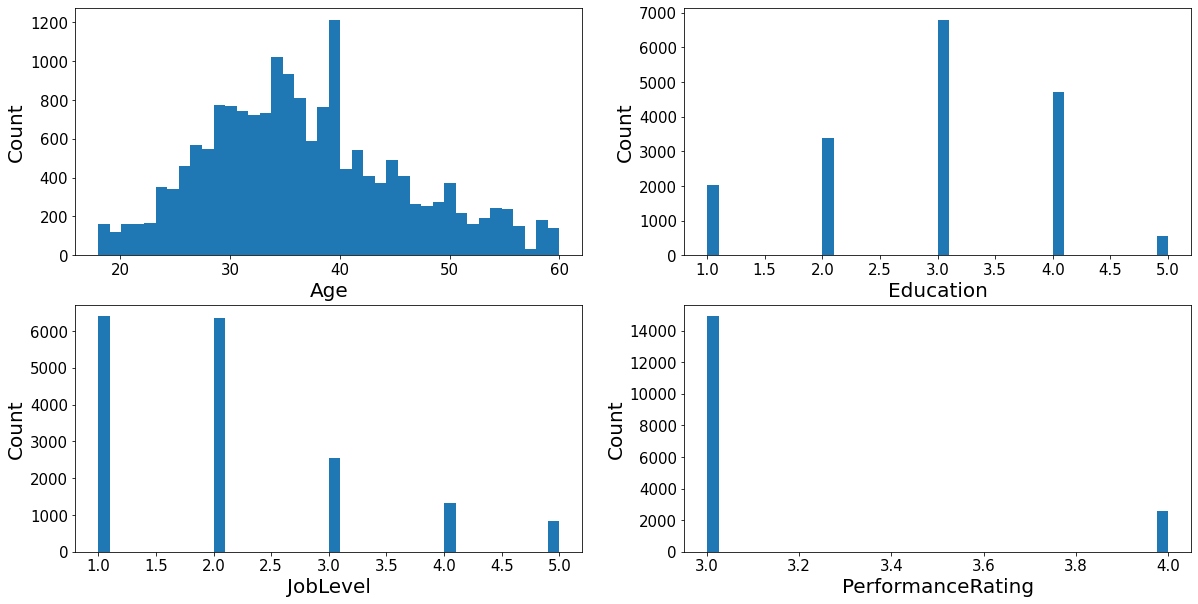

In [91]:
## histograms of numerical features
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features = ['Age', 'Education', 'JobLevel', 'PerformanceRating']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']

## histogram
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_merge2[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

Text(0.5, 1.0, 'Education by Department')

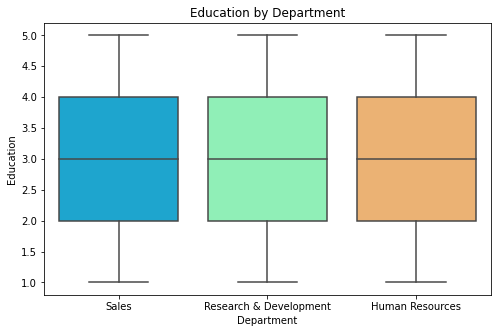

In [95]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Department',y='Education',data=df_merge2, palette='rainbow')
plt.title("Education by Department")

Text(0.5, 1.0, 'Attrition by Age')

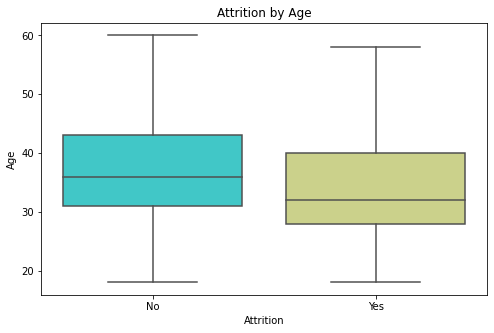

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='Age',data=df_merge2, palette='rainbow')
plt.title("Attrition by Age")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

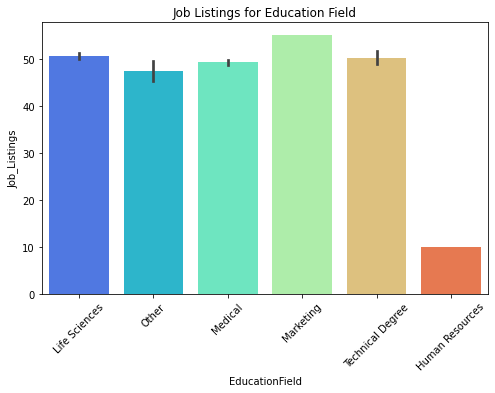

In [99]:
plt.figure(figsize=(8,5))
sns.barplot(x='EducationField',y='Job_Listings',data=df_merge2, palette='rainbow')
plt.title("Job Listings for Education Field")
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Number of Jobs by Department')

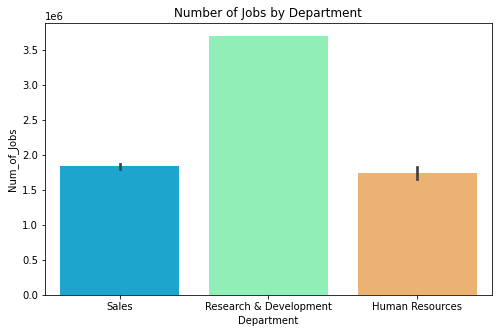

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='Num_of_Jobs',data=df_merge2, palette='rainbow')
plt.title("Number of Jobs by Department")

### Summary
Through the course of the project, I realized the challenges of choosing data sources so early into the project. While I read the overall scope of the project at the start, it wasn't until I progressed through the milestones that I began to understand the impacts that the data sources I selected had on the flexibility of the final outcome. By choosing a more unique flat file, I found it difficult to join the API and website data, as those both had to be aggregated in order to be joined. In a similar vein, the variety within the flat file did not always match to the availability in the other sources. While file manipulation and transformations were done in order to create a primary key to join the data on, each source had a variation in sample size that didn't inherently match with the other. This led to a inequal weight of different categorical fields.

Fortunately, this was a fabricated project, so the volatility in available resources is to be expected. In a real-world application, a heavier weight and consideration to the population sizes would be taken into greater analysis before being signed off on as a reliable data source. This could include conversations with key stakeholders, HR business partners, privacy, legal, and even IT (for reliability of outside data sources). Ethical considerations also need to be made to the accuracy and soundness of any online data source. While these data sources could be used to inform analysis and qualitative data, they would not be large enough in sample size or historical record to drive business decisions.

As stated in earlier milestones, working with employee data involves a lot of sentiment and sensitive information. The proposal, data sources, and use case of the final analysis would all need to be approved by key business partners in order to account for PII, sample bias, and assumption bias. 
